<a href="https://colab.research.google.com/github/zyin36/MAT-422/blob/main/hw1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis

Key idea: Reduce the dimension of a matrix, yet maintain the variation of the data.




###1.4.1 Singular Value Decomposition (SVD)

SVD is a generalization of eigendecomposition, because eigendecomposition only works on a square matrix, while SVD can be applied on a rectangular matrix.

Let $A$ be a $m × n$ matrix. $A^TA$ would be a symmetric $n × n$ matrix, and its eigenvalues are real.

#### ***What is a singular value of a matrix?***

The square root of each eigenvalue of $A^TA$ is a singular value of $A$, which is denoted as $σ_i$.

Singular values are ordered such that $\;$ $σ_1 ≥ σ_2 ≥ \; ... \; \ge σ_n ≥ 0 $

Let $r$ denote the rank of A, which is also the number of nonzero singular values of $A$.

SVD is factorization $\; A = UΣV^T$

Where:
- U is an $m × m$ orthogonal matrix.
- V is an $n × n$ orthogonal matrix.
- Σ is an $m × n$ diagonal matrix of $σ_1, σ_2 \;...\; σ_r$ in order.


In [38]:
# SVD Example
import numpy as np

A = np.random.rand(4, 6) # random rectangular matrix
(U, S, V) = np.linalg.svd(A)

S_mat = np.zeros((4, 6))
np.fill_diagonal( S_mat , S )

prod = U @ S_mat @ V

np.set_printoptions(precision=2)

print(f"U: \n{U}\n")
print(f"S: \n{S}\n")
print(f"S (Matrix): \n{S_mat}\n")
print(f"V^T: \n{V}\n")
print(f"A: \n{A}\n")
print(f"US(V^T): \n{prod}\n")


U: 
[[ 0.38  0.72  0.07  0.57]
 [ 0.62 -0.06 -0.74 -0.25]
 [ 0.42 -0.68  0.22  0.56]
 [ 0.54  0.09  0.64 -0.54]]

S: 
[2.29 0.89 0.47 0.35]

S (Matrix): 
[[2.29 0.   0.   0.   0.   0.  ]
 [0.   0.89 0.   0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.   0.   0.35 0.   0.  ]]

V^T: 
[[ 0.42  0.4   0.42  0.51  0.3   0.37]
 [ 0.09 -0.58 -0.18  0.75 -0.15 -0.19]
 [-0.25 -0.19  0.01 -0.    0.91 -0.28]
 [ 0.56  0.25 -0.01 -0.08 -0.03 -0.78]
 [ 0.54 -0.63  0.3  -0.41  0.08  0.22]
 [ 0.38  0.09 -0.84 -0.05  0.23  0.31]]

A: 
[[0.53 0.02 0.25 0.91 0.19 0.03]
 [0.63 0.64 0.61 0.69 0.13 0.7 ]
 [0.44 0.77 0.51 0.02 0.47 0.28]
 [0.35 0.34 0.51 0.7  0.64 0.5 ]]

US(V^T): 
[[0.53 0.02 0.25 0.91 0.19 0.03]
 [0.63 0.64 0.61 0.69 0.13 0.7 ]
 [0.44 0.77 0.51 0.02 0.47 0.28]
 [0.35 0.34 0.51 0.7  0.64 0.5 ]]



### 1.4.2 Low-rank Matrix Approximations
Rank: The number of linearly independent columns of A matrix.

Goal: Approximate a matrix $A$ by a rank-$k$ matrix by expressing $A$ as a sum of **components**. The components should be ordered by their "importance"

SVD expresses a matrix as a sum of rank-1 matrices. We could express $\hat{A}$ by the first k terms of those components.(How exactly?)

From SVD  $\; A = UΣV^T$, the rank-k approximation is
\begin{align}
        A_k = U_k S_k V_k^T
    \end{align}

Where $U_k$ is the first $k$ columns of $U$ (an $m × k$ matrix),

$V_k^T$ is the first $k$ rows of $V^T$ (an $k × n$ matrix), and

$S_k$ is the first $k$ rows and columns of $S$ (an $k × k$ matrix).


In [42]:
# Low Rank Approximation example
from PIL import Image

# A grayscale image, since a colored image would be a 3D array
img = Image.open('/content/sample_data/euler.jpg').convert('L') # original image
A = np.asarray(img)
(m, n) = A.shape
(U, S, V) = np.linalg.svd(A)

S_mat = np.zeros((m, n))
np.fill_diagonal( S_mat , S )

k = 50 # rank
U_k = U[:, :k]
S_k = S_mat[:k, :k]
V_k = V[:k, :]

A_k = U_k @ S_k @V_k

comp_img = Image.fromarray(A_k.astype('uint8'), mode='L')


### Original Image

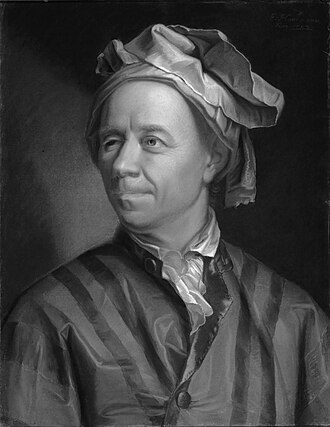

In [43]:
img

Compressed Image

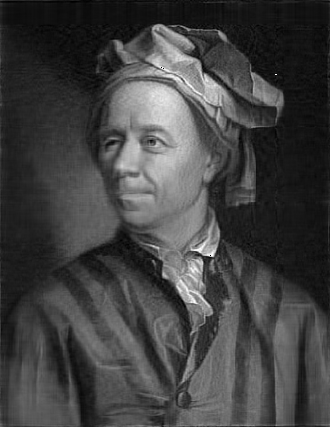

In [44]:
comp_img

In [45]:
print("Size of the original image: ", m*n)
size = U_k.shape[0] * U_k.shape[1] + S_k.shape[0] * S_k.shape[1] + V_k.shape[0] * V_k.shape[1]
print("Size of the compressed image: ", size)

Size of the original image:  140910
Size of the compressed image:  40350


###1.4.3. Principal Component Analysis
Goal: Reduce the dimension of the data while maintaining the variability of the data.

#### Steps:
Given matrix $A$:
1. Center each variable by subtracting the mean
  - Denoting $A_C$ as the "centered" matrix
2. Calculate the covariance matrix
  - Denoting $C$ the covariance matrix
  \begin{align}
        C = A_C A_C^T
    \end{align}
3. Compute the eigenvalues and eigenvectors
4. Sort eigenvalues in descending order
5. Select the first $n$ eigenvectors, where $n$ is the desired dimension
  - Denoting the matrix of eigenvectors as $V$
6. Transform the data
  - $\hat{A} = V^TA$

In [56]:
A = np.random.rand(3, 6) # random rectangular matrix
print(f"A: \n{A}\n")
v_mean = np.mean(A.transpose(), axis=0)
# subtract mean from every column of. i.e. centering A
A = np.transpose(A.transpose() - v_mean)
print((f"A centered: \n{A}\n") )
cov_mat = np.dot(A, A.transpose())
# get eigenvalues and eigenvectors
(eigen_vals, eigen_vecs) = np.linalg.eigh(cov_mat)
# sort eigenvalues in descending order
indices = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[indices]
eigen_vecs = eigen_vecs[:,indices]
# select a subset of eigenvalues and their eigenvectors
n = 2
evec_sub = eigen_vecs[:,0:n]
A_hat = np.dot(evec_sub.transpose(), A)

print(f"A hat: \n{A_hat}\n")




A: 
[[0.21 0.37 0.32 0.46 0.69 0.54]
 [0.1  0.44 0.89 0.55 0.75 0.63]
 [0.17 0.18 0.23 0.31 0.31 0.08]]

A centered: 
[[-0.22 -0.06 -0.11  0.03  0.26  0.11]
 [-0.46 -0.12  0.33 -0.01  0.19  0.07]
 [-0.04 -0.04  0.02  0.1   0.09 -0.13]]

A hat: 
[[ 0.51  0.14 -0.26 -0.02 -0.28 -0.09]
 [ 0.01  0.01  0.24 -0.04 -0.17 -0.05]]



### References

https://math.stackexchange.com/questions/465799/is-matrix-ata-always-symmetric

https://math.berkeley.edu/~hutching/teach/54-2017/svd-notes.pdf

https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

https://web.stanford.edu/class/cs168/l/l9.pdf

https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/#